# Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedroom and bathrooms


In [32]:
#importing statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [33]:
# Loading California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)


In [34]:
print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


C:\Users\megha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


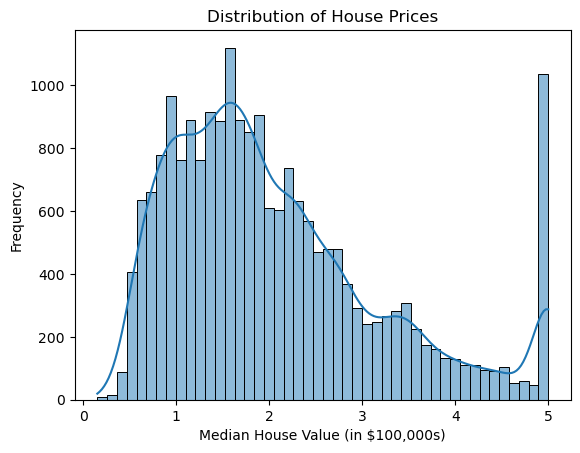

In [37]:
#Visualize the target variable distribution
sns.histplot(y, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.show()


In [38]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Predict on validation data
y_pred = model.predict(X_val)


In [41]:
#evaluating rmse
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 0.75


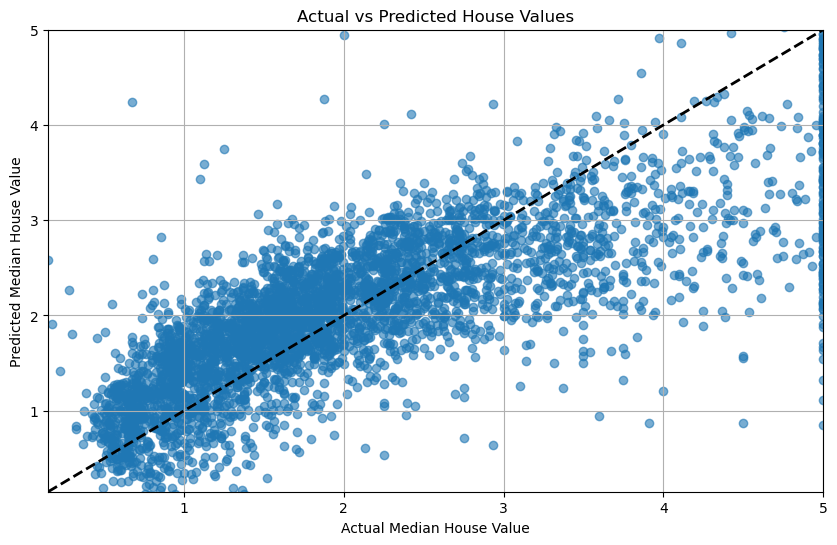

In [42]:

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Values')
plt.xlim(y_val.min(), y_val.max())
plt.ylim(y_val.min(), y_val.max())
plt.grid()
plt.show()
